# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Carlos Esteban Aristizábal**   
cearistizabala@unal.edu.co  
M.Sc Gestión Energética Industrial (cand.). ITM
Ingebiero Químico. UNAL
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [207]:
import pandas as pd

x=[]
    
for n in range(1995,2018):
    if n < 2000:
        skip = 3
    else:
        skip = 2
    nomar = ('Precio_Bolsa_Nacional_($kwh)_' + str(n)  ) #
    if n>2016:
        nomar += '.xls'
    else:
        nomar += '.xlsx'
    
    y=pd.read_excel('Precio_Bolsa_Nacional_($kwh)_' + str(n) + '.xlsx', skiprows=skip, 
                    parse_cols=24)#parse dice el número de columnas a tomar
    x.append(y)
    z=pd.concat(x)

z.head(), z.tail(2)

(        Fecha      0      1      2      3      4      5      6      7      8  \
 0  1995-07-20    NaN  1.073  1.073  1.073  1.073  1.073  1.073  1.073  1.074   
 1  1995-07-21  1.073  1.000  1.000  1.000  1.000  1.000  5.000  6.000  6.000   
 2  1995-07-22  1.073  1.073  1.000  1.000  1.000  1.073  1.303  1.303  1.303   
 3  1995-07-23  1.073  1.000  1.000  1.000  1.000  1.000  0.100  1.000  1.000   
 4  1995-07-24  1.000  1.000  0.990  1.000  1.000  1.073  3.000  3.000  3.000   
 
    ...       14     15     16     17      18      19      20     21     22  \
 0  ...    1.073  1.073  1.073  1.073   1.074   1.897   1.897  1.897  1.073   
 1  ...    5.000  1.000  1.000  5.000  12.000  16.670  11.929  5.000  1.000   
 2  ...    1.073  1.000  1.000  1.000   1.303   2.500   2.500  1.303  1.073   
 3  ...    1.000  0.100  0.100  1.000   1.238   1.238   1.238  1.238  1.073   
 4  ...    1.073  1.073  3.000  2.000  18.630  22.500   9.256  3.000  1.073   
 
       23  
 0  1.073  
 1  1.000  


**2.--** Compute e imprima el número de registros con datos faltantes.

In [208]:
NAN=z.isnull().values.ravel().sum()
print(NAN)

247


**3.--** Compute e imprima el número de registros duplicados.

In [209]:
Dup=z[z.duplicated()]
print(len(Dup))

67


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [210]:
DatossinNAN=z.dropna()
DatossinNAN.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,1.000,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,1.073,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.073,1.073,1.263,1.500,1.263,1.263,1.073,0.990


In [211]:
DatosF=DatossinNAN.drop_duplicates()
DF=DatosF
DatosF.head(4)

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
1,1995-07-21,1.073,1.000,1.00,1.0,1.0,1.000,5.000,6.000,6.000,...,5.000,1.000,1.0,5.0,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.00,1.0,1.0,1.073,1.303,1.303,1.303,...,1.073,1.000,1.0,1.0,1.303,2.500,2.500,1.303,1.073,1.073
3,1995-07-23,1.073,1.000,1.00,1.0,1.0,1.000,0.100,1.000,1.000,...,1.000,0.100,0.1,1.0,1.238,1.238,1.238,1.238,1.073,1.000
4,1995-07-24,1.000,1.000,0.99,1.0,1.0,1.073,3.000,3.000,3.000,...,1.073,1.073,3.0,2.0,18.630,22.500,9.256,3.000,1.073,1.000


In [212]:
v=[]

for n in range (len(DatosF['Fecha'])):
    v.append(str(DatosF.iloc[n,0])[0:7])
DatosF['key']=v
DatosF.head()


/Users/carlosestebanaristizabal/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Fecha,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,key
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000,1995-07
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1995-07
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000,1995-07
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000,1995-07
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1995-07


**5.--** Compute y grafique el precio promedio diario.

In [217]:
MeanDia=DF.groupby('Fecha').mean()
MeanDia=MeanDia.mean(axis=1)
MeanDia.head(1)

1996-02-01    13.903167
dtype: float64

In [218]:
#import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

len(DatosF), len(DF)

(7875, 7875)

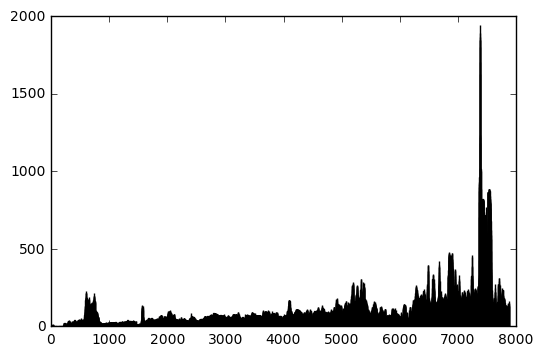

In [219]:
plt.bar(range(len(MeanDia)), MeanDia)
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

In [221]:
MaxMes=DatosF.groupby('key').max()
MaxMes=MaxMes.max(axis=1)
MaxMes.head()

key
1995-07     22.500
1995-08     40.000
1995-09     40.572
1995-10     33.700
1995-11    111.907
dtype: float64

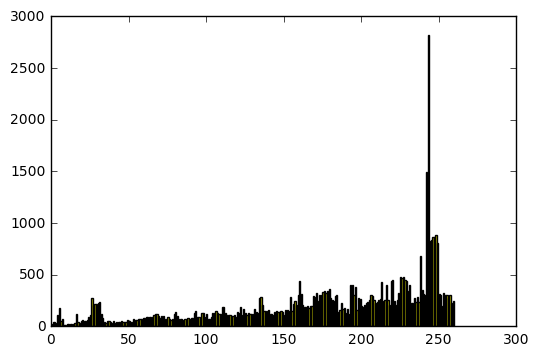

In [222]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.bar(range(len(MaxMes)), MaxMes, color='y')
plt.show()

**7.--** Compute y grafique el precio mínimo mensual.

In [223]:
MinMes=DatosF.groupby('key').min()
MinMes=MinMes.min(axis=1)
MinMes.head()

key
1995-07    0.000
1995-08    0.000
1995-09    1.073
1995-10    0.000
1995-11    1.072
dtype: float64

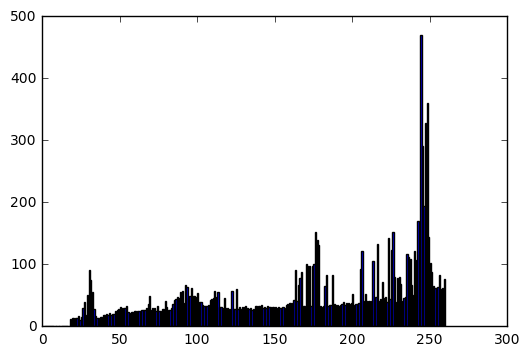

In [224]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.bar(range(len(MinMes)), MinMes, color='b')
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [225]:
PromMes=DatosF.groupby('key').mean()
PromMes=PromMes.mean(axis=1)
PromMes.head()

key
1995-07     1.552087
1995-08     7.086462
1995-09    10.955819
1995-10    10.445442
1995-11    27.534782
dtype: float64

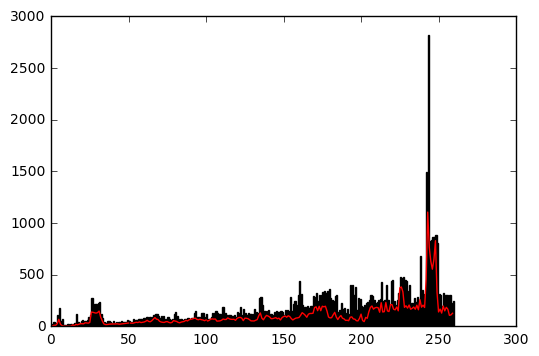

In [291]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.plot(range(len(PromMes)), PromMes, color='r')
plt.ion()
plt.bar(range(len(MaxMes)), MaxMes, color='k')
plt.show()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [227]:
MaxDia=DatosF.groupby('Fecha').max()
MaxDia=MaxDia.max(axis=1)

In [228]:
e=[1, 2, 3, 1, 1, 1, 1]*int(len(DatosF)/7)
DatosF['Dia semana']=e

r=[]

for n in range (len(DatosF['Fecha'])):
    r.append(max(DatosF.iloc[n,1:24]))
DatosF['PMaxD']=r
DatosF.head(2)

/Users/carlosestebanaristizabal/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/carlosestebanaristizabal/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Fecha,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,key,Dia semana,PMaxD
1,1995-07-21,1.073,1.000,1.0,1.0,1.0,1.000,5.000,6.000,6.000,...,5.0,12.000,16.67,11.929,5.000,1.000,1.000,1995-07,1,16.67
2,1995-07-22,1.073,1.073,1.0,1.0,1.0,1.073,1.303,1.303,1.303,...,1.0,1.303,2.50,2.500,1.303,1.073,1.073,1995-07,2,2.50


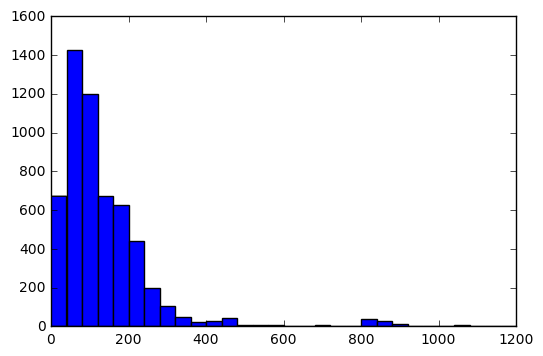

In [229]:
Ddia= DatosF[DatosF['Dia semana']==1]
plt.hist(Ddia['PMaxD'], bins=30, range=(0,1200), stacked=True, color = ['b'])
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

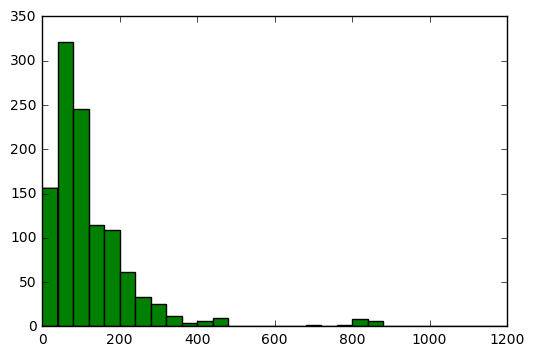

In [230]:
Dsab= DatosF[DatosF['Dia semana']==2]
plt.hist(Dsab['PMaxD'], bins=30, range=(0,1200), stacked=True, color = ['g'])
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

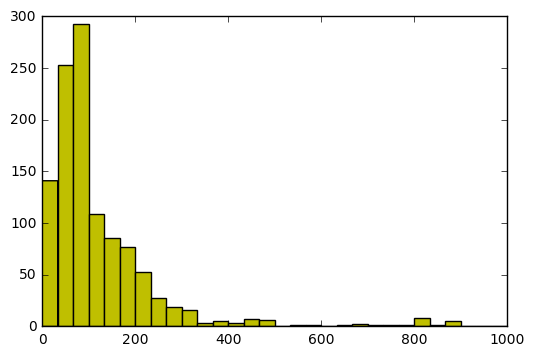

In [231]:
Dsab= DatosF[DatosF['Dia semana']==3]
plt.hist(Dsab['PMaxD'], bins=30, range=(0,1000), stacked=True, color = ['y'])
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [256]:
year=[]

for n in range (len(DatosF['Fecha'])):
    year.append(str(DatosF.iloc[n,0])[0:4])
DatosF['Año']=year

/Users/carlosestebanaristizabal/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [300]:
MinYear=DatosF.groupby('Año').min()
MinYear=MinYear.min(axis=1)

In [301]:
from IPython.display import display
display(MinYear)

Año
1995    0.0
1996    0.0
1997    1.0
1998    1.0
1999    1.0
2000    1.0
2001    1.0
2002    1.0
2003    1.0
2004    1.0
2005    1.0
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
dtype: float64

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [302]:
len(PromMes), len(MeanDia), len('Fecha')
MeanDia.head()

1996-02-01    13.891385
1996-02-02    13.631385
1996-02-03    14.446115
1996-02-04     7.115615
1996-02-05     8.346346
dtype: float64

In [318]:
w=[]
MeanDia=DF.groupby('Fecha').mean()
MeanDia=MeanDia.mean(axis=1)
w=MeanDia

In [331]:
PromMD=w.groupby(v)

In [332]:
len(PromMD)

260

In [329]:
display(PromMD.head(), PromMes.tail())

1996-02-01 00:00:00     13.891385
1996-02-02 00:00:00     13.631385
1996-02-03 00:00:00     14.446115
1996-02-04 00:00:00      7.115615
1996-02-05 00:00:00      8.346346
1996-02-12 00:00:00     10.038462
1996-02-13 00:00:00     10.103846
1996-02-14 00:00:00      8.503462
1996-02-15 00:00:00      6.034615
1996-02-16 00:00:00      6.634192
1996-03-14 00:00:00      2.051385
1996-03-15 00:00:00      2.067500
1996-03-16 00:00:00      1.595538
1996-03-17 00:00:00      1.788462
1996-03-18 00:00:00      2.544000
1996-04-13 00:00:00      2.600000
1996-04-14 00:00:00      2.776923
1996-04-15 00:00:00      3.026923
1996-04-16 00:00:00      4.249500
1996-04-17 00:00:00      3.637077
1996-05-14 00:00:00      2.486308
1996-05-15 00:00:00      2.978846
1996-05-16 00:00:00      2.232885
1996-05-17 00:00:00      1.682308
1996-05-18 00:00:00      1.367000
1996-06-13 00:00:00      2.576923
1996-06-14 00:00:00      2.865385
1996-06-15 00:00:00      3.176192
1996-06-16 00:00:00      1.749615
1996-06-17 00:

key
2016-10    184.907520
2016-11    166.532592
2016-12    107.439280
2017-01    111.560500
2017-02    127.531748
dtype: float64

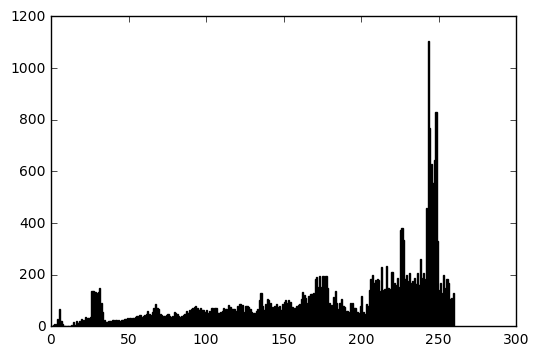

In [328]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.bar(range(len(PromMes)), PromMes, color='k')
plt.show()

---